# Visualization of the UPFD Dataset

## Import Data

In [1]:
import os
import torch
import numpy as np
from gds.datasets.upfd_dataset import UPFDDataset

In [2]:
# download  and process the dataset
root_dir = '/cmlscratch/kong/datasets/graph_domain'
dataset = UPFDDataset(root_dir=root_dir, model='gin')

In [3]:
# set variables
split_scheme = dataset._split_scheme
y_type = dataset._y_type 
y_size = dataset._y_size
n_classes = dataset._n_classes

In [4]:
# initialize data

# Here ogb_dataset.data is a torch_geometric.data.Data object
# See the docs at https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html?highlight=data.data.Data#torch_geometric.data.Data

# node features
x_array = dataset.ogb_dataset.data.x.data.numpy()

# graph connectivity
edge_index_array = dataset.ogb_dataset.data.edge_index.data.numpy()

# edge features
edge_attr_array = None

# labels
y_array = dataset.ogb_dataset.data.y.data.numpy()

# train/val/test split
split_array = dataset._split_array

# scaffold (metadata)
scaffold_array = dataset._metadata_array_wo_y.squeeze()

# num of nodes in each graph
num_of_nodes_array = np.array([dataset[i][0].x.shape[0] for i in range(len(dataset))])

# num of edges in each graph
num_of_edges_array = np.array([dataset[i][0].edge_index.shape[1] for i in range(len(dataset))])


In [5]:
print('Shapes of variables:')
print('x: ', x_array.shape)
print('edge index: ', edge_index_array.shape)
if edge_attr_array is not None:
    print('edge attributes: ', edge_attr_array.shape) 
print('y: ', y_array.shape)
print('split: ', split_array.shape)
print('scaffold: ', scaffold_array.shape)
print('num of nodes: ', num_of_nodes_array.shape)
print('num of edges: ', num_of_edges_array.shape)

Shapes of variables:
x:  (314262,)
edge index:  (2, 308798)
y:  (5464,)
split:  torch.Size([5464])
scaffold:  torch.Size([5464])
num of nodes:  (5464,)
num of edges:  (5464,)


In [6]:
print('Heads of these variables:')
print('x: \n', x_array[:5])
print('edge index: \n', edge_index_array[:, :5])
if edge_attr_array is not None: 
    print('edge attributes: \n', edge_attr_array[:5, :])
print('y: \n', y_array[:5])
print('split: \n', split_array[:10])
print('scaffold: \n', scaffold_array[:10])
print('num of nodes: \n', num_of_nodes_array[:10])
print('num of edges: \n', num_of_edges_array[:10])

Heads of these variables:
x: 
 [5 6 3 2 5]
edge index: 
 [[0 0 0 0 0]
 [1 2 3 4 5]]
y: 
 [0 1 1 0 0]
split: 
 tensor([1, 2, 0, 0, 1, 0, 0, 0, 1, 0])
scaffold: 
 tensor([7, 9, 0, 5, 7, 2, 7, 7, 7, 3])
num of nodes: 
 [ 76 125   6  56  90  21  76  89  77  27]
num of edges: 
 [ 75 124   5  55  89  20  75  88  76  26]


## Basic Statistics

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

### Q1: Is the scaffold indices ordered? And what is the distribution of scaffold sizes? 
Try plotting a histogram of scaffold indices, if so, the small indices will appear most

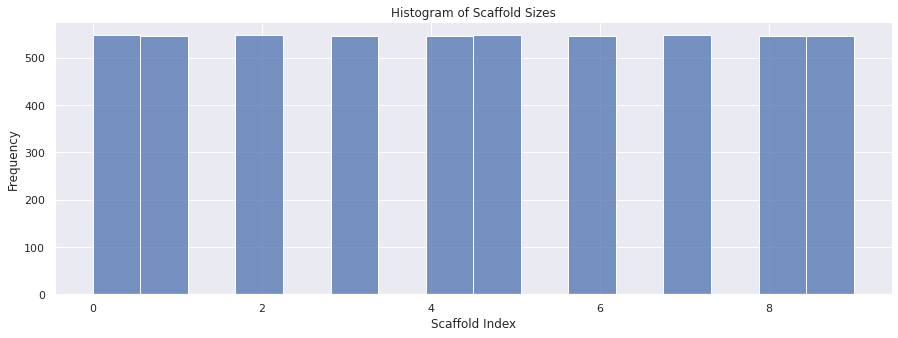

In [8]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(scaffold_array)
ax.set_xlabel('Scaffold Index')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Scaffold Sizes')
plt.show()

From the plot above we can see the "exponential distribution" of scaffold sizes

### Q2: What is the distribution of garph sizes? Are the average graph sizes in each scaffold very different?

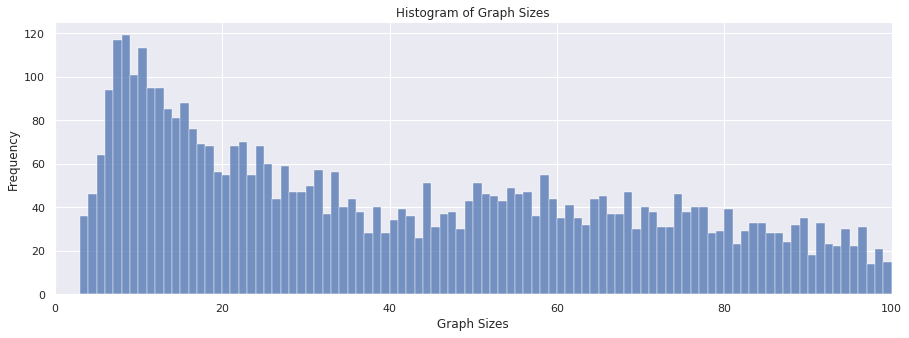

Average number of nodes per graph:  57.515007320644216


In [9]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(num_of_nodes_array, binwidth=1)
ax.set_xlabel('Graph Sizes')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Graph Sizes')
ax.set_xlim([0, 100])
plt.show()
print('Average number of nodes per graph: ', np.mean(num_of_nodes_array))

In [10]:
df = pd.DataFrame({'scaffold_idx': scaffold_array, 'graph_size': num_of_nodes_array})
df.groupby('scaffold_idx', as_index=False)['graph_size'].mean().head(10)

,scaffold_idx,graph_size
0,0,6.555759
1,1,11.957875
2,2,18.961609
3,3,28.278388
4,4,41.238095
5,5,54.820841
6,6,68.194139
7,7,83.989031
8,8,107.417582
9,9,153.857143


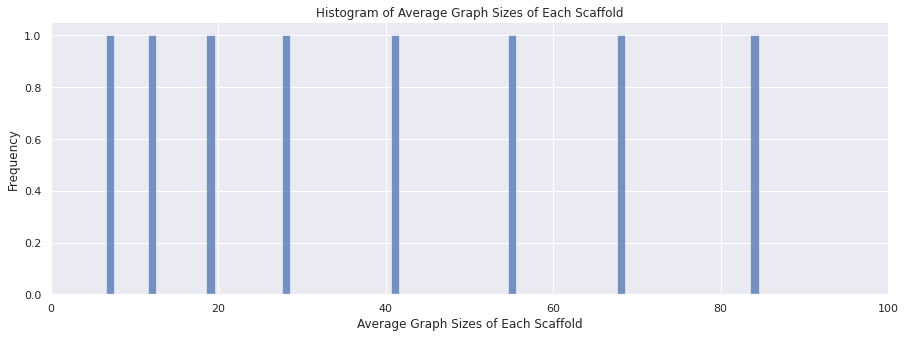

In [11]:
average_sizes_per_scaffold = df.groupby('scaffold_idx')['graph_size'].mean().to_numpy()
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(average_sizes_per_scaffold, binwidth=1)
ax.set_xlabel('Average Graph Sizes of Each Scaffold')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Average Graph Sizes of Each Scaffold')
ax.set_xlim([0, 100])
plt.show()

very minor difference to the original distribution of graph sizes, thus the distribution of graph sizes is almost independent from the scaffold

### Q3: Similarly, what is the distribution of number of edges per graph? Are the average number of edges per graph in each scaffold very different?

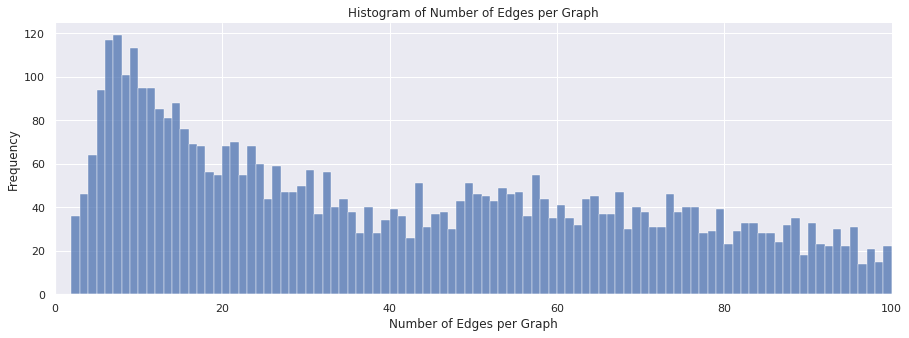

Average number of edges per graph:  56.515007320644216


In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(num_of_edges_array, binwidth=1)
ax.set_xlabel('Number of Edges per Graph')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Number of Edges per Graph')
ax.set_xlim([0, 100])
plt.show()
print('Average number of edges per graph: ', np.mean(num_of_edges_array))

In [13]:
df = pd.DataFrame({'scaffold_idx': scaffold_array, 'number_of_edges': num_of_edges_array})
df.groupby('scaffold_idx', as_index=False)['number_of_edges'].mean().head(10)

,scaffold_idx,number_of_edges
0,0,5.555759
1,1,10.957875
2,2,17.961609
3,3,27.278388
4,4,40.238095
5,5,53.820841
6,6,67.194139
7,7,82.989031
8,8,106.417582
9,9,152.857143


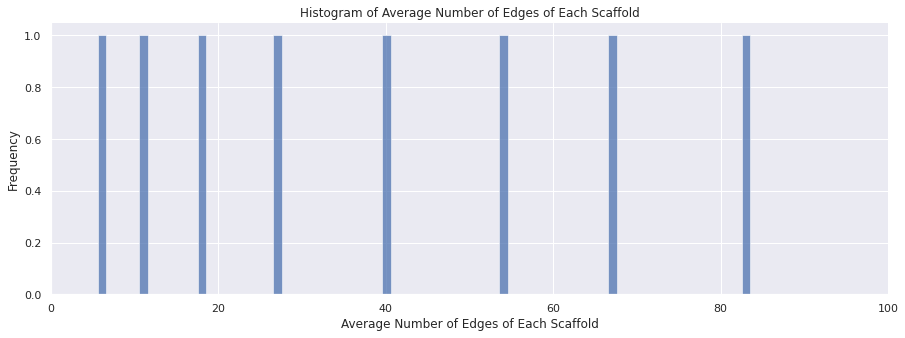

In [14]:
average_nedges_per_scaffold = df.groupby('scaffold_idx')['number_of_edges'].mean().to_numpy()
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(average_nedges_per_scaffold, binwidth=1)
ax.set_xlabel('Average Number of Edges of Each Scaffold')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Average Number of Edges of Each Scaffold')
ax.set_xlim([0, 100])
plt.show()

Note the average size and number of edges matches the numbers on https://ogb.stanford.edu/docs/graphprop/

## Q4: Are the graph size and number of edges strongly correlated? What is the distribution of average degrees?

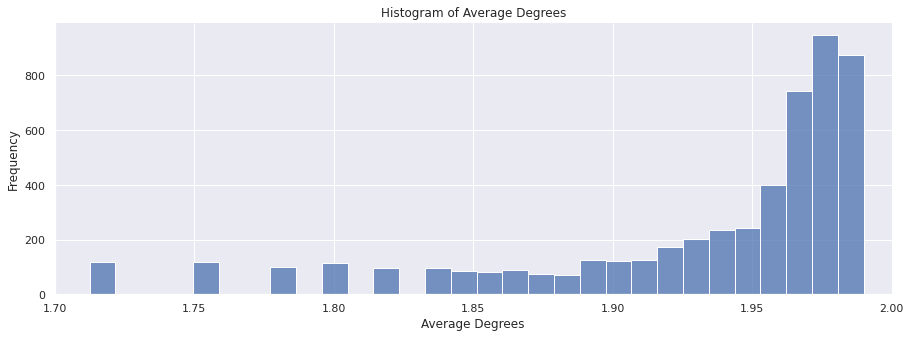

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(num_of_edges_array*2.0/num_of_nodes_array)
ax.set_xlabel('Average Degrees')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Average Degrees')
ax.set_xlim([1.7, 2])
plt.show()

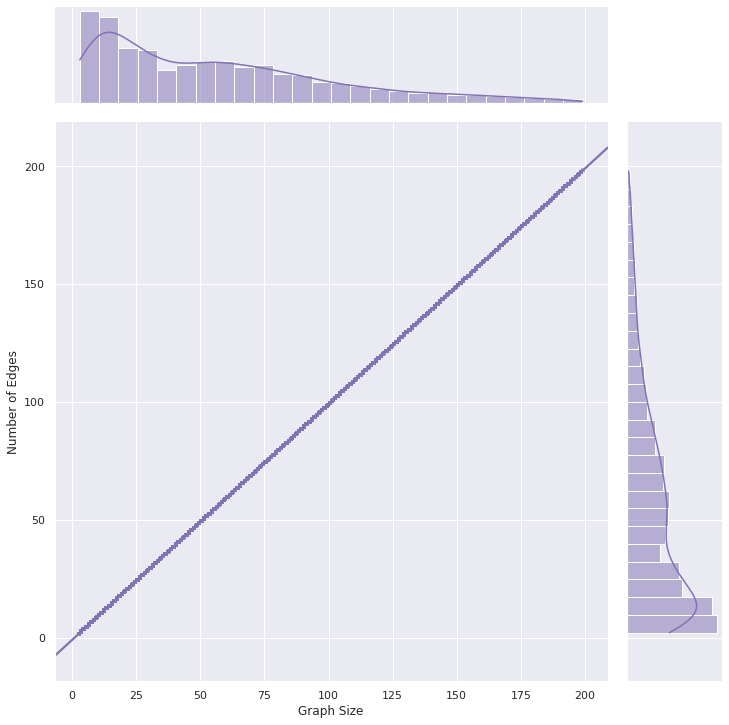

In [16]:
np.random.seed(0)
sample_graph_idx = np.random.choice(num_of_nodes_array.shape[0], 5000, replace=False)
f = sns.jointplot(x=num_of_nodes_array[sample_graph_idx], y=num_of_edges_array[sample_graph_idx], 
              kind="reg", truncate=False, marker='+', color="m", height=10)
f.set_axis_labels('Graph Size', 'Number of Edges')

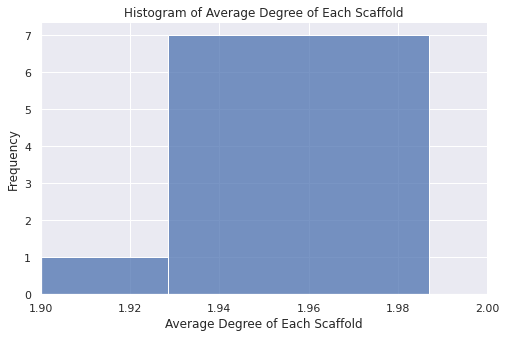

In [17]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)
sns.histplot(average_nedges_per_scaffold*2.0/average_sizes_per_scaffold)
ax.set_xlabel('Average Degree of Each Scaffold')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Average Degree of Each Scaffold')
ax.set_xlim([1.9, 2])
plt.show()

## Visualization of Graphs within and across Scaffolds

In [42]:
import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher 
from networkx.drawing.nx_pydot import graphviz_layout

node_index_ranges = np.pad(np.cumsum(num_of_nodes_array), (1,0))
edge_index_ranges = np.pad(np.cumsum(num_of_edges_array), (1,0))

In [53]:
def reverse_dict(d):
    return {v: k for k, v in d.items()}

def parse_graph(graph_idx):
    edge_list = edge_index_array[:,edge_index_ranges[graph_idx]:edge_index_ranges[graph_idx+1]].T    
    g = nx.Graph([tuple(e) for e in edge_list])
    
    # set the node features
    x = x_array[node_index_ranges[graph_idx]:node_index_ranges[graph_idx+1]]
    nx.set_node_attributes(g, {node: x[node] for node in g}, 'attributes')
    # set the edge features (TODO later)
    nx.set_edge_attributes(g, [], "attributes")
    return g

def draw_graph(g, title=None, fontsize=16):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    nx.draw(g, pos=graphviz_layout(g, prog="twopi"), ax=ax, node_size=10, width=0.2)
    if title is not None:
        ax.set_title(title, fontsize=fontsize)
    plt.show()

def draw_scaffold(g_array, sg, node_mapping_array, scaffold_idx, graph_idx_array, scaffold_x_array):
    ngraphs = len(g_array)
    fig, ax = plt.subplots((ngraphs+1)//2, 2, figsize=(14, 5*(ngraphs+1)//2))
    plt.subplots_adjust(top=0.95)
    fig.suptitle('Graphs in scaffold #{}'.format(scaffold_idx), fontsize=20)
    # find the node colors and the layouts
    color_map_array = []
    sg_pos = nx.spring_layout(sg, k=1/np.sqrt(len(sg))*10, iterations=1000, threshold=1e-6)
    pos_array = []
    for g, node_mapping in zip(g_array, node_mapping_array):
        color_map_array.append(['red' if node in node_mapping.values() else 'blue' for node in g])
        mapped_sg_pos = {node_mapping[n]: v for n, v in sg_pos.items()}
        pos = nx.spring_layout(g, pos=mapped_sg_pos, fixed=list(node_mapping.values()), iterations=1000, threshold=1e-5)
        pos_array.append(pos)
    # draw graphs
    for i, g in enumerate(g_array):
        nx.draw(g, node_color=color_map_array[i], pos=pos_array[i], ax=ax[i//2, i%2])
        nx.draw_networkx_labels(g, pos=pos_array[i], labels={node: scaffold_x_array[i][node, 0] for node in g}, 
                                ax=ax[i//2, i%2])
        ax[i//2, i%2].set_title('Graph #{}'.format(graph_idx_array[i]), fontsize=14)
    if ngraphs%2 == 1:
        ax[-1, -1].axis('off')
    plt.show()


# find and parse the graphs in a scaffold
def analyze_scaffold():
    sca0 = 0 
    sca1 = 9
    
    graph_idx_array_0 = np.where(scaffold_array == sca0)[0]
    graph_idx_array_1 = np.where(scaffold_array == sca1)[0]
    
    g_array_0 = [parse_graph(idx) for idx in graph_idx_array_0]
    g_array_1 = [parse_graph(idx) for idx in graph_idx_array_1]

    # find a pair of graphs first
    # for the ISMAGS algorithm to run fast, choose the largest and smallest graphs in the scaffold
    graph_size_array_0 = np.array([len(g) for g in g_array_0])
    graph_size_array_1 = np.array([len(g) for g in g_array_1])
    
    i0, i1 = np.argmax(graph_size_array_0), np.argmin(graph_size_array_1)
    g0, g1 = g_array_0[i0], g_array_1[i1]
    # find a largest common subgraph between them
    print('Working on testing if Graph #{} (size {}) is isomorphic to subgraph of Graph #{} (size {}).'.format(
        graph_size_array_0[i0], len(g0), graph_size_array_1[i1], len(g1)))
    
    gm = GraphMatcher(g1, g0)
    if gm.subgraph_is_isomorphic() :
        sg = g0
    else :
        raise ValueError('Not isomorphic')
    
#     node_mapping = list(ismags.largest_common_subgraph(symmetry=True))[0]
#     print('We find a largest common subgraph of size {}.'.format(len(node_mapping)))
#     sg0 = g0.subgraph(list(node_mapping.keys()))
#     sg1 = g1.subgraph(list(node_mapping.values()))
#     sg = sg0

#     # reducing the subgraph on other graphs
#     print('Working on reducing the subgraph on other graphs in this scaffold')
#     for i, g in enumerate(g_array):
#         if i in [i1, i2]:
#             continue
#         if not GraphMatcher(g, sg).subgraph_is_isomorphic():
#             print('Graph #{:6} doesn\'t contain the subgraph of size {}.'.format(graph_idx_array[i], len(sg)))
#             print('Working on finding the largest common subgraph between Graph #{} (size {}) and the previous subgraph (size {}).'.format(
#                 graph_idx_array[i], len(g), len(sg)))
#             ismags = nx.isomorphism.ISMAGS(g, sg)
#             node_mapping = list(ismags.largest_common_subgraph(symmetry=True))[0]
#             print('Size of the largest common subgraph reduced to {}.'.format(len(node_mapping)))
#             sg = sg.subgraph(list(node_mapping.values()))
#         else:
#             print('Graph #{:6} indeed contains the subgraph of size {}.'.format(graph_idx_array[i], len(sg)))
#     print('We conclude the largest common subgraph of scaffold #{} has size {}.'.format(scaffold_idx, len(sg)))
    
#     # find the node mappings
#     node_mapping_array = [reverse_dict(list(GraphMatcher(g, sg).subgraph_isomorphisms_iter())[0]) for g in [g0, g1]]
#     # select the node features
#     scaffold_x_array = []
#     for graph_idx in [graph_idx_array_0[i0], graph_idx_array_0[i1]]:
#         scaffold_x_array.append(x_array[node_index_ranges[graph_idx]:node_index_ranges[graph_idx+1],:])
#     # draw the graphs in the scaffold
#     draw_scaffold([g0,g1], sg, node_mapping_array, scaffold_idx, [graph_idx_array_0[i0], graph_idx_array_1[i1]], scaffold_x_array)

    draw_graph(g0)
    draw_graph(g1)

Working on testing if Graph #9 (size 9) is isomorphic to subgraph of Graph #124 (size 124).


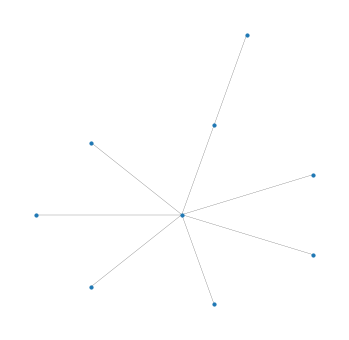

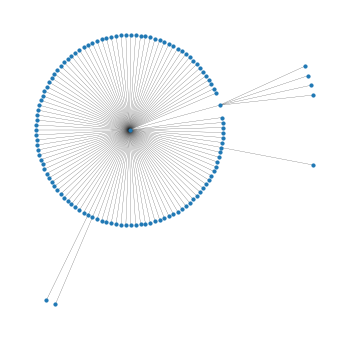

In [54]:
analyze_scaffold()